## <strong>PROJETO FINAL VISÃO COMPUTACIONAL</strong>
**EXOPLANETAS**

Nicole Sarvasi Alves da Costa

Marcelo Miguel

In [ ]:
! python -m pip install lightkurve --upgrade

     |████████████████████████████████| 247 kB 5.1 MB/s 
     |████████████████████████████████| 41 kB 172 kB/s 
     |████████████████████████████████| 98 kB 6.5 MB/s 
     |████████████████████████████████| 4.5 MB 55.0 MB/s 
     |████████████████████████████████| 802 kB 45.1 MB/s 
     |████████████████████████████████| 54 kB 2.4 MB/s 
     |████████████████████████████████| 3.6 MB 42.7 MB/s 
  Created wheel for fbpca: filename=fbpca-1.0-py3-none-any.whl size=11376 sha256=872884a2bae133fad7f89f53a143fc3eca89a6d1203e08158001cdb91f584fb1
  Stored in directory: /root/.cache/pip/wheels/93/08/0c/1b9866c35c8d3f136d100dfe88036a32e0795437daca089f70
  Created wheel for memoization: filename=memoization-0.4.0-py3-none-any.whl size=50466 sha256=ab0977383ebeea95a3e177e150c9d1b43397f18cc9f28fb4ed30ce2f395ea898
  Stored in directory: /root/.cache/pip/wheels/38/f7/65/161985e7311dd484a23b3a5c9149995dbf11db6cede602e7ef
  Created wheel for oktopus: filename=oktopus-0.1.2-py3-none-any.whl size=12778 s

In [ ]:
from lightkurve import search_targetpixelfile
pixelfile = search_targetpixelfile("KIC 8462852", quarter=16).download();


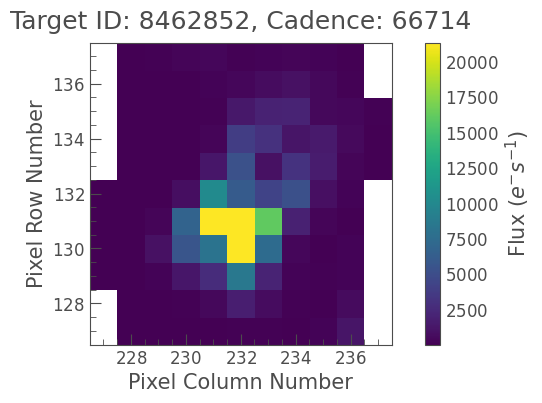

In [ ]:
pixelfile.plot(frame=1);